In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from ydata_profiling import ProfileReport
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)

In [103]:
data = pd.read_excel("./Case Study 1 Data.xlsx")

In [104]:
data.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
0,SI_000001,CityA,3974.00,2.00,2.00,2007.00,Good,Single Family,2020-11-02,324000.00
1,SI_000002,CityA,1660.00,2.00,3.00,1934.00,Good,Single Family,2022-10-23,795000.00
2,SI_000003,CityC,2094.00,2.00,2.00,1950.00,Good,Single Family,2020-11-30,385000.00
3,SI_000004,CityB,1930.00,2.00,3.00,1905.00,Good,Single Family,2021-12-09,651000.00
4,SI_000005,CityB,1895.00,5.00,2.00,1936.00,New,Single Family,2024-10-30,1878000.00


In [111]:
data.shape

(241735, 10)

In [105]:
#descriptive statistics summary
data['Price'].describe()

count    241735.00
mean     466088.28
std      231502.61
min       26000.00
25%      300000.00
50%      417000.00
75%      577000.00
max     2223000.00
Name: Price, dtype: float64

In [106]:
data['Property ID'].nunique(), data.shape[0]

(247172, 247172)

In [107]:
data.isna().sum()

Property ID        0
Location           0
Size            2471
Bedrooms        8403
Bathrooms       6673
Year Built     12605
Condition      10628
Type               0
Date Sold          0
Price           5437
dtype: int64

In [108]:
data = data[~data['Price'].isna()]

In [112]:
data = data[~data['Condition'].isna()]

In [115]:
data.isna().sum()

Property ID    0
Location       0
Size           0
Bedrooms       0
Bathrooms      0
Year Built     0
Condition      0
Type           0
Date Sold      0
Price          0
dtype: int64

In [114]:
data = data.dropna()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241735 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Property ID  241735 non-null  object        
 1   Location     241735 non-null  object        
 2   Size         241735 non-null  float64       
 3   Bedrooms     238769 non-null  float64       
 4   Bathrooms    240499 non-null  float64       
 5   Year Built   234567 non-null  float64       
 6   Condition    236544 non-null  object        
 7   Type         241735 non-null  object        
 8   Date Sold    241735 non-null  datetime64[ns]
 9   Price        241735 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 20.3+ MB


In [35]:
data.describe()

,Size,Bedrooms,Bathrooms,Year Built,Date Sold,Price
count,241735.00,238769.00,240499.00,234567.00,241735,241735.00
mean,2402.48,3.00,2.00,1961.43,2022-07-02 07:04:43.773553920,466088.28
min,800.00,1.00,1.00,1900.00,2020-01-01 00:00:00,26000.00
25%,1603.00,2.00,1.00,1931.00,2021-04-02 00:00:00,300000.00
50%,2404.00,3.00,2.00,1961.00,2022-07-04 00:00:00,417000.00
75%,3202.00,4.00,3.00,1992.00,2023-10-02 00:00:00,577000.00
max,3999.00,5.00,3.00,2023.00,2024-12-31 00:00:00,2223000.00
std,923.36,1.42,0.82,35.75,NaN,231502.61


In [36]:
data['Date Sold']

0        2020-11-02
1        2022-10-23
2        2020-11-30
3        2021-12-09
4        2024-10-30
            ...    
247167   2022-06-22
247168   2020-09-20
247169   2022-06-25
247170   2021-06-08
247171   2024-10-23
Name: Date Sold, Length: 241735, dtype: datetime64[ns]

In [37]:
data.columns

Index(['Property ID', 'Location', 'Size', 'Bedrooms', 'Bathrooms',
       'Year Built', 'Condition', 'Type', 'Date Sold', 'Price'],
      dtype='object')

In [53]:
data['Date Sold'] = pd.to_datetime(data['Date Sold'])
data['day']   = data['Date Sold'].dt.day
data['month'] = data['Date Sold'].dt.month
data['year']  = data['Date Sold'].dt.year

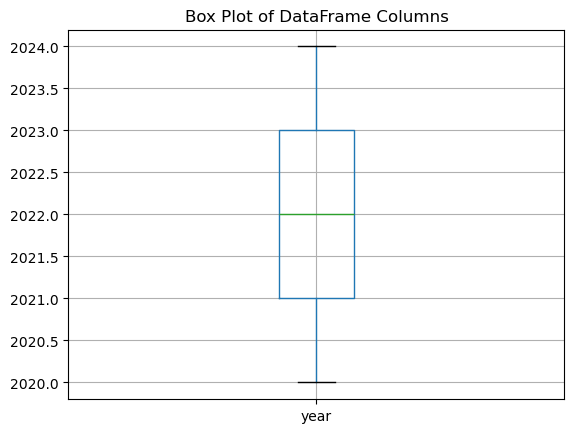

In [54]:
# Create a box plot for all numerical columns
data[['year']].boxplot()
plt.title('Box Plot of DataFrame Columns')
plt.show()

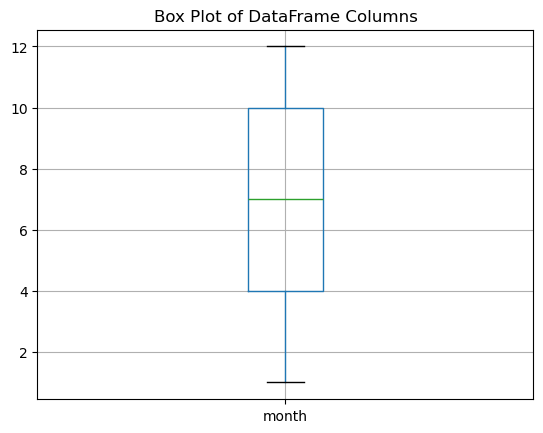

In [57]:
# Create a box plot for all numerical columns
data[['month']].boxplot()
plt.title('Box Plot of DataFrame Columns')
plt.show()

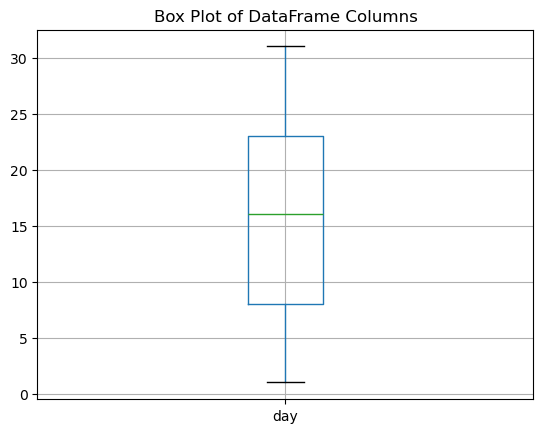

In [56]:
# Create a box plot for all numerical columns
data[['day']].boxplot()
plt.title('Box Plot of DataFrame Columns')
plt.show()

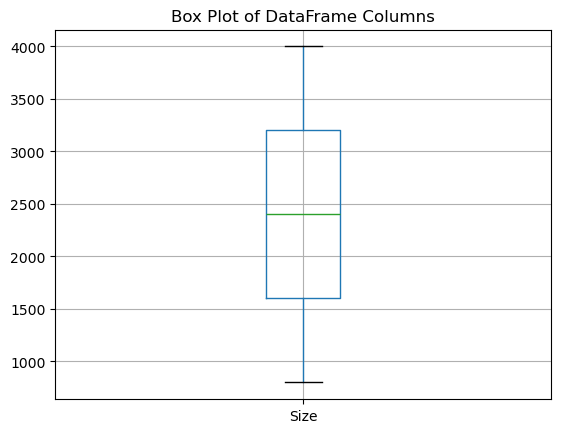

In [52]:
# Create a box plot for all numerical columns
data[['Size']].boxplot()
plt.title('Box Plot of DataFrame Columns')
plt.show()

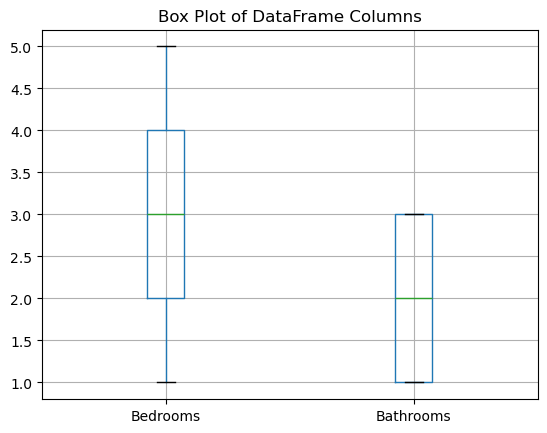

In [39]:
# Create a box plot for all numerical columns
data[['Bedrooms', 'Bathrooms']].boxplot()
plt.title('Box Plot of DataFrame Columns')
plt.show()

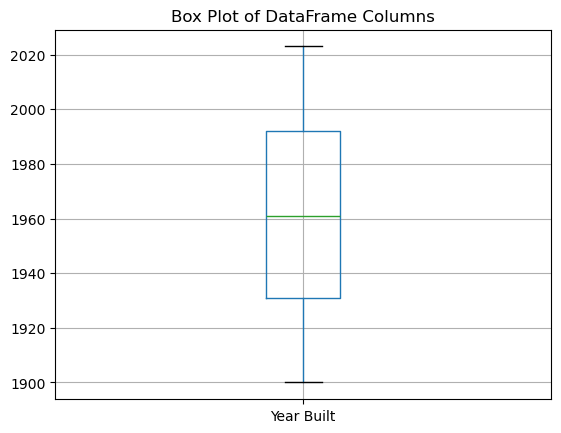

In [40]:
# Create a box plot for all numerical columns
data[['Year Built']].boxplot()
plt.title('Box Plot of DataFrame Columns')
plt.show()

In [49]:
data['Date Sold'].value_counts().reset_index()

,Date Sold,count
0,2020-11-27,174
1,2021-06-21,174
2,2020-07-28,169
3,2024-06-06,167
4,2023-01-02,166
...,...,...
1822,2020-03-13,102
1823,2021-03-13,101
1824,2020-01-21,100
1825,2020-06-04,100


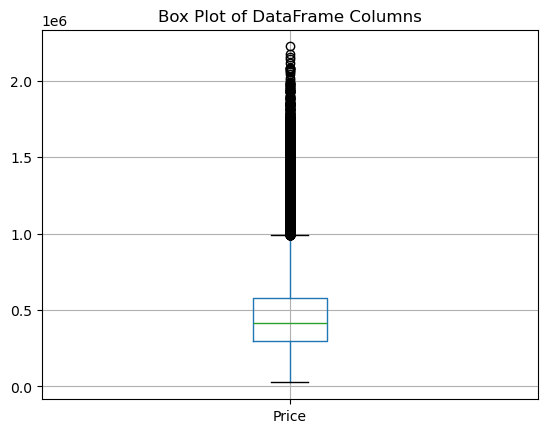

In [25]:
# Create a box plot for all numerical columns
data[['Price']].boxplot()
plt.title('Box Plot of DataFrame Columns')
plt.show()

In [58]:
from scipy.stats import zscore

data['size_zscore']   = zscore(data['Size'])
data['price_zscore']  = zscore(data['Price'])

data['is_outlier_size_z']  = data['size_zscore'].abs()  > 3
data['is_outlier_price_z'] = data['price_zscore'].abs() > 3

In [69]:
data[data['is_outlier_price_z']==True]

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price,day,month,year,size_zscore,price_zscore,is_outlier_size_z,is_outlier_price_z
4,SI_000005,CityB,1895.00,5.00,2.00,1936.00,New,Single Family,2024-10-30,1878000.00,30,10,2024,-0.55,6.10,False,True
42,SI_000043,CityB,1362.00,5.00,1.00,1953.00,New,Single Family,2024-10-24,2070000.00,24,10,2024,-1.13,6.93,False,True
61,SI_000062,CityB,2163.00,2.00,3.00,1948.00,Good,Single Family,2024-12-06,1249000.00,6,12,2024,-0.26,3.38,False,True
142,SI_000143,CityB,1760.00,5.00,2.00,1946.00,Good,Single Family,2023-10-24,1209000.00,24,10,2023,-0.70,3.21,False,True
170,SI_000171,CityB,1859.00,1.00,2.00,1952.00,Good,Single Family,2024-07-31,1172000.00,31,7,2024,-0.59,3.05,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246973,TO_099802,CityB,1381.00,5.00,1.00,1931.00,Good,Townhouse,2024-08-07,1441000.00,7,8,2024,-1.11,4.21,False,True
247029,TO_099858,CityA,1012.00,5.00,2.00,2002.00,New,Townhouse,2024-06-06,1241000.00,6,6,2024,-1.51,3.35,False,True
247038,TO_099867,CityA,1423.00,4.00,2.00,1942.00,New,Townhouse,2024-02-28,1181000.00,28,2,2024,-1.06,3.09,False,True
247054,TO_099883,CityB,1477.00,1.00,1.00,2020.00,New,Townhouse,2023-11-08,1224000.00,8,11,2023,-1.00,3.27,False,True


In [67]:
data[data['is_outlier_price_z']==True]['Condition'].value_counts()

Condition
Good    1862
New     1513
Fair      81
Name: count, dtype: int64

In [68]:
data['Condition'].value_counts()

Condition
Good    94629
Fair    71194
Poor    47244
New     23477
Name: count, dtype: int64

In [70]:
data[data['is_outlier_price_z']==True]['year'].value_counts()

year
2024    2787
2023     689
2022      55
Name: count, dtype: int64

In [72]:
data['year'].value_counts()

year
2020    48470
2024    48452
2023    48362
2022    48320
2021    48131
Name: count, dtype: int64

In [79]:
data['Location'].value_counts()

Location
CityC    60715
CityA    60612
CityD    60337
CityB    60071
Name: count, dtype: int64

In [90]:
#── 5) Price per square foot ────────────────────────────────────────
data['ppsf'] = data['Price'] / data['Size']

In [91]:
data.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price,day,month,year,size_zscore,price_zscore,is_outlier_size_z,is_outlier_price_z,ppsf
0,SI_000001,CityA,3974.00,2.00,2.00,2007.00,Good,Single Family,2020-11-02,324000.00,2,11,2020,1.70,-0.61,False,False,81.53
1,SI_000002,CityA,1660.00,2.00,3.00,1934.00,Good,Single Family,2022-10-23,795000.00,23,10,2022,-0.80,1.42,False,False,478.92
2,SI_000003,CityC,2094.00,2.00,2.00,1950.00,Good,Single Family,2020-11-30,385000.00,30,11,2020,-0.33,-0.35,False,False,183.86
3,SI_000004,CityB,1930.00,2.00,3.00,1905.00,Good,Single Family,2021-12-09,651000.00,9,12,2021,-0.51,0.80,False,False,337.31
4,SI_000005,CityB,1895.00,5.00,2.00,1936.00,New,Single Family,2024-10-30,1878000.00,30,10,2024,-0.55,6.10,False,True,991.03


In [ ]:
#── Imports ──────────────────────────────────────────────────────────
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# assume you’ve already got `df` loaded and cleaned

#── 3) Bivariate scatter & correlations ─────────────────────────────
# Scatter + LOWESS for key numeric pairs
for feat in ['Size', 'Bedrooms', 'Year Built']:
    plt.figure(figsize=(8,5))
    sns.regplot(
        x=feat, y='Price', data=df,
        lowess=True,
        scatter_kws={'alpha':0.3, 's':20}
    )
    plt.title(f'Price vs {feat} (with LOWESS)')
    plt.tight_layout()
    plt.show()

# Correlation matrix + heatmap
num_cols = ['Price','Size','Bedrooms','Bathrooms','Year Built']
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


#── 4) Categorical price comparisons ─────────────────────────────────
# Group top‑10 locations, rest as “Other”
top_locs = df['Location'].value_counts().nlargest(10).index
df['loc_top10'] = df['Location'].where(df['Location'].isin(top_locs), 'Other')

plt.figure(figsize=(12,6))
sns.boxplot(x='loc_top10', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Top 10 Locations')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x='Condition', y='Price', data=df)
plt.title('Price by Condition')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x='Type', y='Price', data=df)
plt.title('Price by Type')
plt.tight_layout()
plt.show()


#── 5) Price per square foot ────────────────────────────────────────
df['ppsf'] = df['Price'] / df['Size']

plt.figure(figsize=(8,4))
sns.histplot(df['ppsf'], bins=50, kde=True)
plt.title('Price per SqFt Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Condition', y='ppsf', data=df)
plt.title('Price per SqFt by Condition')
plt.tight_layout()
plt.show()


#── 8) Distribution & transform checks ───────────────────────────────
for feat in ['Price','Size','ppsf']:
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[feat], bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f'Original {feat}')
    sns.histplot(np.log1p(df[feat]), bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f'Log1p {feat}')
    plt.tight_layout()
    plt.show()

    # QQ‑plot on log1p
    plt.figure(figsize=(5,4))
    stats.probplot(np.log1p(df[feat]), dist="norm", plot=plt)
    plt.title(f'QQ‑Plot of log1p({feat})')
    plt.tight_layout()
    plt.show()


In [ ]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:02<00:00,  6.17it/s]


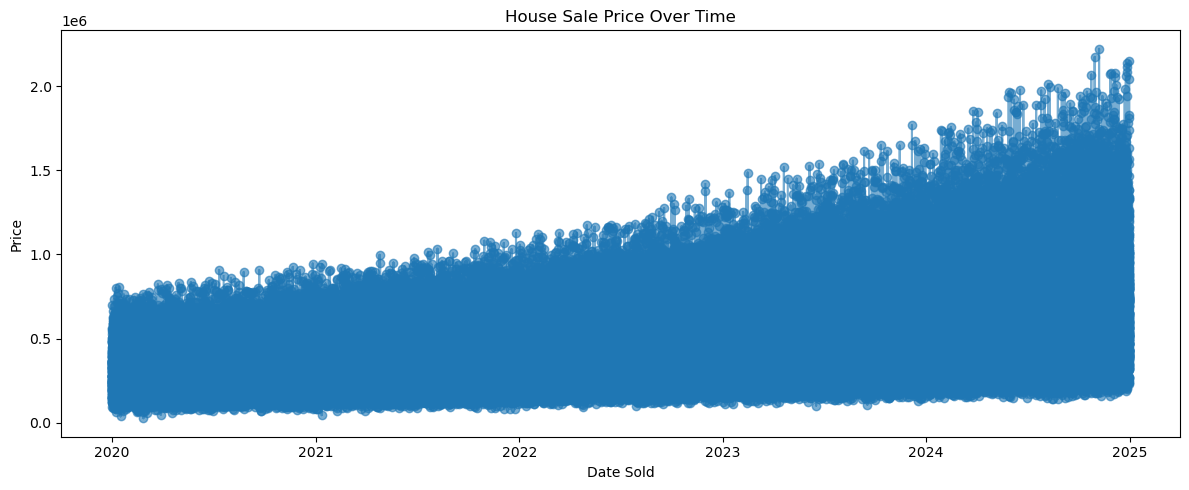

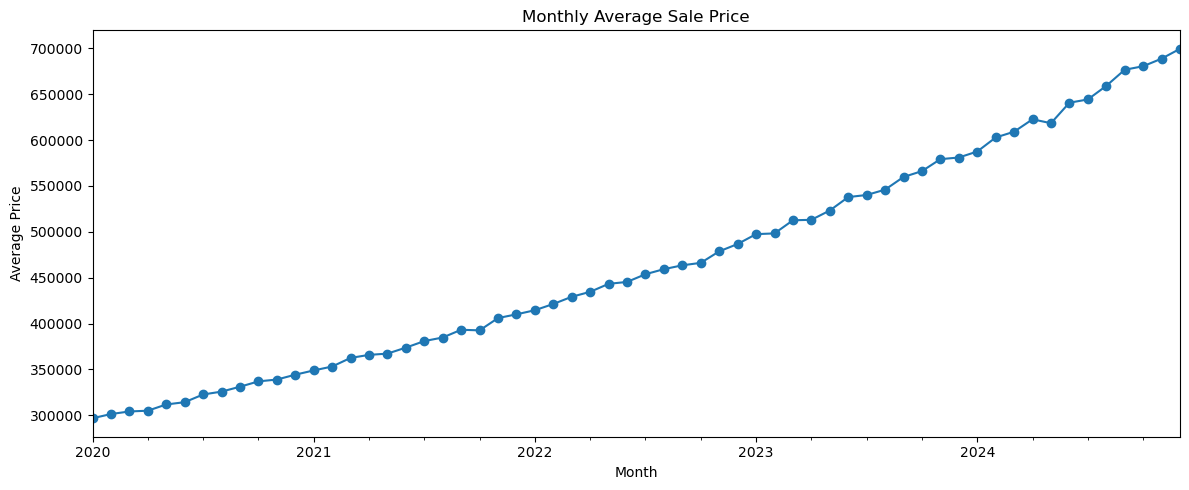

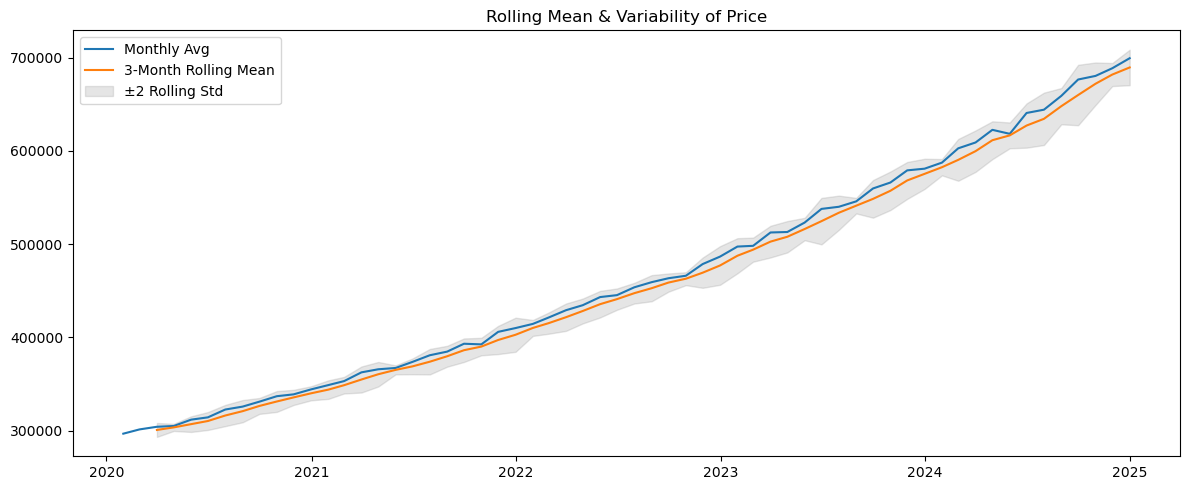

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Load your data and parse dates
df = pd.read_excel('./Case Study 1 Data.xlsx')
df['Date Sold'] = pd.to_datetime(df['Date Sold'], dayfirst=True)

# 2. Sort and set Date Sold as index
df = df.sort_values('Date Sold').set_index('Date Sold')

# 3. Plot the raw time series of Price
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Price'], marker='o', linestyle='-', alpha=0.6)
plt.title('House Sale Price Over Time')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# 4. Aggregate to monthly average price
monthly_price = df['Price'].resample('M').mean()

plt.figure(figsize=(12, 5))
monthly_price.plot(marker='o')
plt.title('Monthly Average Sale Price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# 5. Rolling statistics (3‑month window)
rolling_mean = monthly_price.rolling(window=3).mean()
rolling_std  = monthly_price.rolling(window=3).std()

plt.figure(figsize=(12, 5))
plt.plot(monthly_price, label='Monthly Avg')
plt.plot(rolling_mean,  label='3‑Month Rolling Mean')
plt.fill_between(rolling_std.index,
                 rolling_mean - 2*rolling_std,
                 rolling_mean + 2*rolling_std,
                 color='gray', alpha=0.2,
                 label='±2 Rolling Std')
plt.title('Rolling Mean & Variability of Price')
plt.legend()
plt.tight_layout()
plt.show()



<Figure size 1200x400 with 0 Axes>

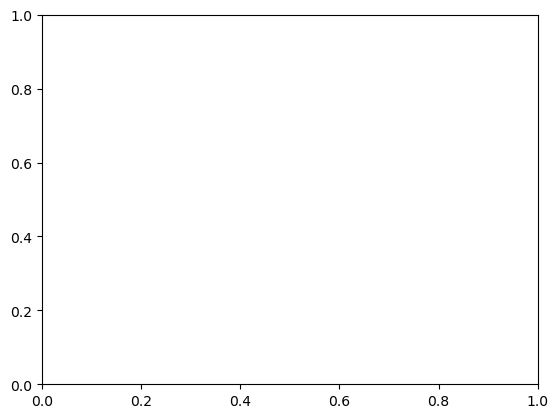

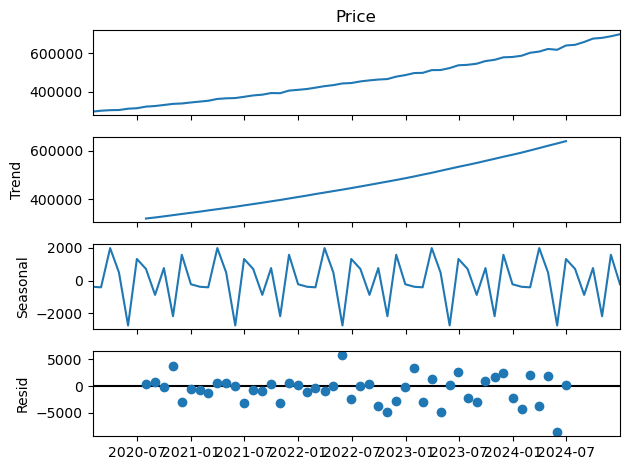

<Figure size 1200x400 with 0 Axes>

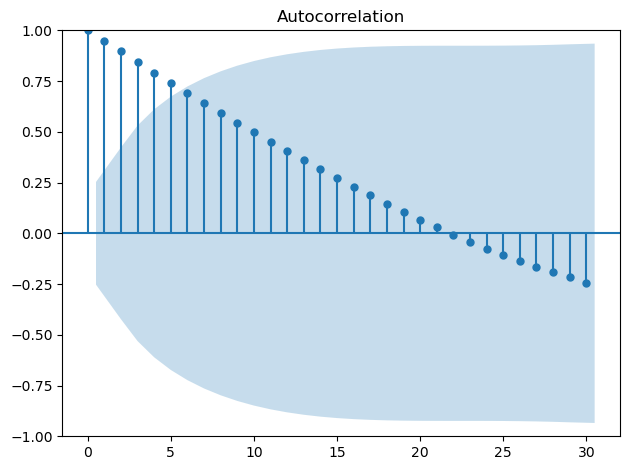

<Figure size 1200x400 with 0 Axes>

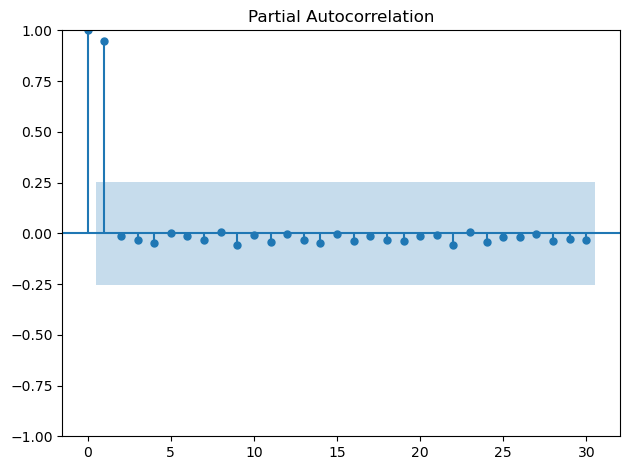

In [78]:
# 6. Seasonal decomposition (additive)
decomp = seasonal_decompose(monthly_price.dropna(), model='additive', period=12)
decomp.plot()
plt.tight_layout()
plt.show()

# 7. Autocorrelation & Partial Autocorrelation
plt.figure(figsize=(12,4))
plot_acf(monthly_price.dropna(), lags=30, alpha=0.05)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(monthly_price.dropna(), lags=30, alpha=0.05)
plt.tight_layout()
plt.show()

In [92]:
df.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Price
Date Sold,,,,,,,,,
2020-01-01,SI_070190,CityC,3866.00,1.00,3.00,1943.00,Poor,Single Family,131000.00
2020-01-01,TO_060007,CityD,3281.00,3.00,2.00,1987.00,Good,Townhouse,228000.00
2020-01-01,CO_034174,CityA,3842.00,NaN,NaN,NaN,NaN,Condominium,NaN
2020-01-01,TO_046470,CityA,1016.00,3.00,1.00,1917.00,Good,Townhouse,494000.00
2020-01-01,SI_031356,CityC,1032.00,4.00,1.00,1901.00,Poor,Single Family,239000.00


In [ ]:
df = df[df['Location']=='CityA']

In [97]:
data['ppsf'] = data['Price'] / data['Size']

In [98]:
data.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price,day,month,year,size_zscore,price_zscore,is_outlier_size_z,is_outlier_price_z,ppsf
0,SI_000001,CityA,3974.00,2.00,2.00,2007.00,Good,Single Family,2020-11-02,324000.00,2,11,2020,1.70,-0.61,False,False,81.53
1,SI_000002,CityA,1660.00,2.00,3.00,1934.00,Good,Single Family,2022-10-23,795000.00,23,10,2022,-0.80,1.42,False,False,478.92
2,SI_000003,CityC,2094.00,2.00,2.00,1950.00,Good,Single Family,2020-11-30,385000.00,30,11,2020,-0.33,-0.35,False,False,183.86
3,SI_000004,CityB,1930.00,2.00,3.00,1905.00,Good,Single Family,2021-12-09,651000.00,9,12,2021,-0.51,0.80,False,False,337.31
4,SI_000005,CityB,1895.00,5.00,2.00,1936.00,New,Single Family,2024-10-30,1878000.00,30,10,2024,-0.55,6.10,False,True,991.03


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

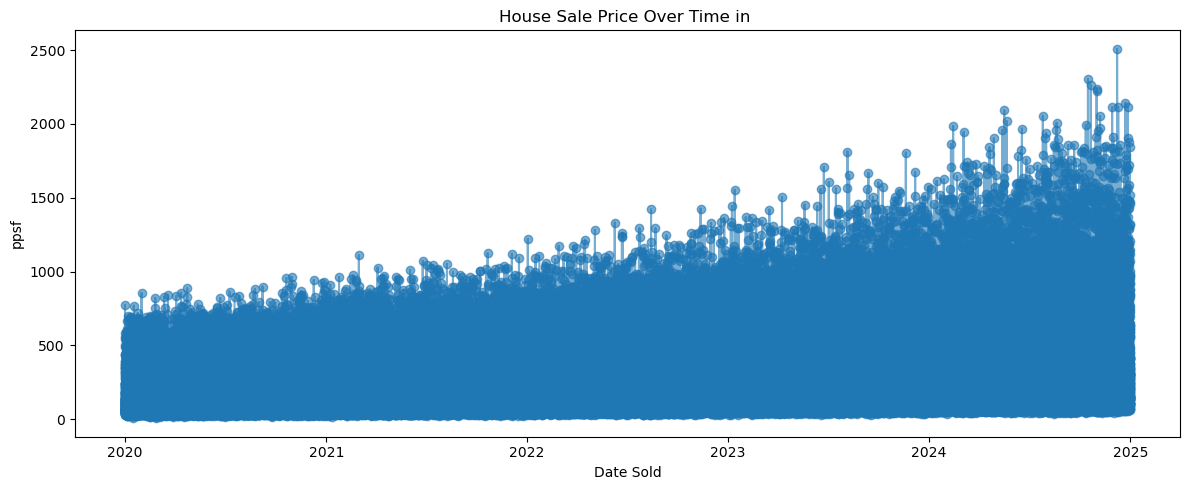

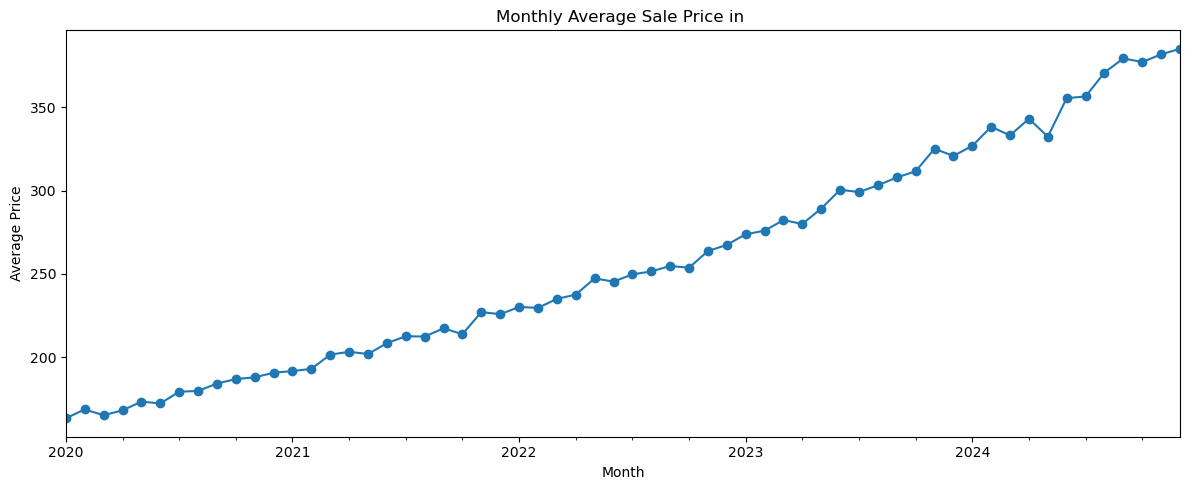

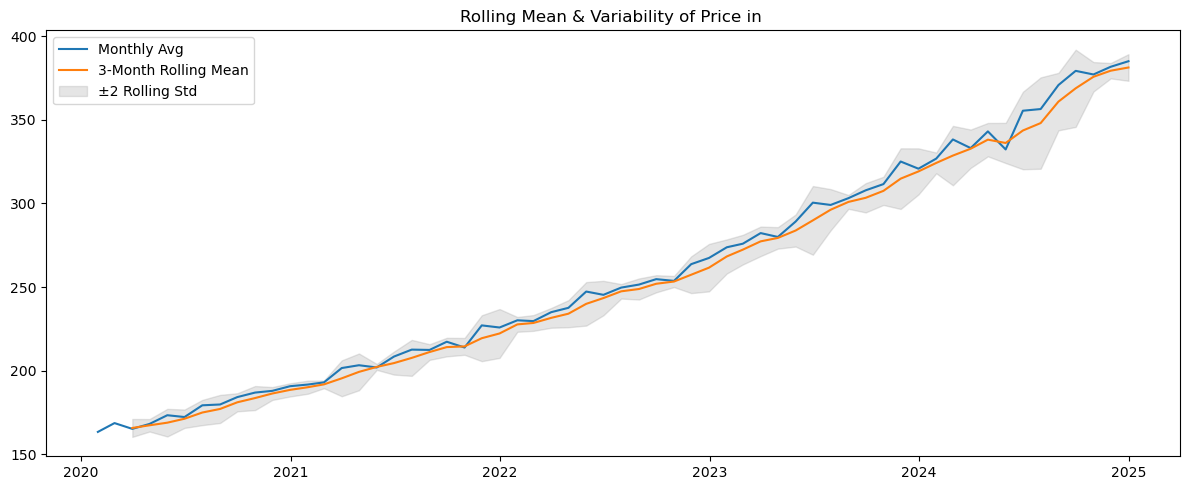

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
city = ''
# 1. Load your data and parse dates
df = pd.read_excel('./Case Study 1 Data.xlsx')
df['ppsf'] = df['Price'] / df['Size']
# df = df[df['Location']==city]
df['Date Sold'] = pd.to_datetime(df['Date Sold'], dayfirst=True)

# 2. Sort and set Date Sold as index
df = df.sort_values('Date Sold').set_index('Date Sold')

# 3. Plot the raw time series of Price
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['ppsf'], marker='o', linestyle='-', alpha=0.6)
plt.title(f'House Sale Price Over Time in {city}')
plt.xlabel('Date Sold')
plt.ylabel('ppsf')
plt.tight_layout()
plt.show()

# 4. Aggregate to monthly average price
monthly_price = df['ppsf'].resample('M').mean()

plt.figure(figsize=(12, 5))
monthly_price.plot(marker='o')
plt.title(f'Monthly Average Sale Price in {city}')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

# 5. Rolling statistics (3‑month window)
rolling_mean = monthly_price.rolling(window=3).mean()
rolling_std  = monthly_price.rolling(window=3).std()

plt.figure(figsize=(12, 5))
plt.plot(monthly_price, label='Monthly Avg')
plt.plot(rolling_mean,  label='3‑Month Rolling Mean')
plt.fill_between(rolling_std.index,
                 rolling_mean - 2*rolling_std,
                 rolling_mean + 2*rolling_std,
                 color='gray', alpha=0.2,
                 label='±2 Rolling Std')
plt.title(f'Rolling Mean & Variability of Price in {city}')
plt.legend()
plt.tight_layout()
plt.show()



In [118]:
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        dates = pd.to_datetime(X['Date Sold'], dayfirst=True)
        X['day']            = dates.dt.day
        X['month']          = dates.dt.month
        X['year']           = dates.dt.year
        X['age']            = X['year'] - X['Year Built']
        X['bed_bath_ratio'] = X['Bedrooms'] / X['Bathrooms']
        X['size_bed_ratio'] = X['Size'] / X['Bedrooms']
        start = dates.min()
        X['days_since_start'] = (dates - start).dt.days
        X['time_sq']         = X['days_since_start'] ** 2
        X['month_sin']       = np.sin(2 * np.pi * X['month'] / 12)
        X['month_cos']       = np.cos(2 * np.pi * X['month'] / 12)
        return X.drop(columns=['Date Sold'])

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
from scipy.stats import zscore

# Load the trained model
model = joblib.load("stacking_model.pkl")
df = pd.read_excel("Case Study 1 Data.xlsx")
df = df.drop(columns=['Property ID']).dropna(subset=['Price'])
df['price_z'] = zscore(df['Price'])
df = df[df['price_z'].abs() <= 3].drop(columns=['price_z'])
X = df.drop(columns=['Price'])
y = df['Price']

y_pred = model.predict(X)
residuals = y - y_pred

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Predicted Price': y_pred, 'Residuals': residuals})

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(plot_df['Residuals'], kde=True, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Predicted vs Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted Price', y='Residuals', data=plot_df, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Predicted vs. Residuals Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

ImportError: cannot import name 'get_spawning_popen' from 'joblib.externals.loky.backend.context' (C:\Users\arnav\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical and numerical features based on the res_df DataFrame
cat_feats = ['Location', 'Condition', 'Type']
# Exclude 'residual' and the original categorical features from numeric features for plotting
numeric_feats_for_plotting = [col for col in res_df.columns if col not in cat_feats and col != 'residual']

# Visualize residuals for categorical features (Box plots)
print("Visualizing residuals for categorical features:")
for feat in cat_feats:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feat, y='residual', data=res_df)
    plt.title(f'Residuals by {feat}')
    plt.xlabel(feat)
    plt.ylabel('Residuals')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize residuals for numerical features (Scatter plots)
print("\nVisualizing residuals for numerical features:")
for feat in numeric_feats_for_plotting:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feat, y='residual', data=res_df, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs. {feat}')
    plt.xlabel(feat)
    plt.ylabel('Residuals')
    plt.show()